In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.model_selection import train_test_split # holdout
from eli5.sklearn import PermutationImportance
from sklearn.metrics import matthews_corrcoef, make_scorer
import pycaret
from pycaret.classification import *


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/anaconda3/envs/mushrooms/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/anaconda3/envs/mushrooms/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/homebrew/anaconda3/envs/mushrooms/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in st

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [2]:
DATA = Path("../../data")

In [3]:
train_data = pd.read_csv(DATA / "train_value_preprocessing_01.csv")
test_data = pd.read_csv(DATA / "test_value_preprocessing_01.csv")

In [12]:
feature = train_data.iloc[:, 1:]
target = train_data.iloc[:, 0]

In [15]:
train_X, valid_X, train_y, valid_y = train_test_split(feature, target, test_size=0.3, shuffle=True, stratify=target, random_state=42) # Holdout

In [16]:
print(f"Train_X Shape : {train_X.shape}")
print(f"Valid_X Shape : {valid_X.shape}")
print(f"Train_y Shape : {train_y.shape}")
print(f"Valid_y Shape : {valid_y.shape}")

Train_X Shape : (18029, 12)
Valid_X Shape : (7727, 12)
Train_y Shape : (18029,)
Valid_y Shape : (7727,)


In [17]:
train_data

,class,cap-diameter,cap-color,stem-height,stem-width,stem-color,season,cap-diameter_log1p,stem-width_log1p,stem-height_log1p,cap-shape_is_x,gill-attachment_is_d,gill-color_is_n
0,0,2.74,1,4.33,2.57,1,0,1.319086,1.272566,1.673351,0,0,0
1,0,3.64,0,5.35,3.56,1,1,1.534714,1.517323,1.848455,0,0,0
2,0,3.62,0,4.22,3.11,1,1,1.530395,1.413423,1.652497,0,0,0
3,0,5.09,0,5.50,3.19,1,0,1.806648,1.432701,1.871802,0,0,0
4,1,1.73,2,2.58,2.81,1,1,1.004302,1.337629,1.275363,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25751,0,4.18,0,6.03,3.81,1,0,1.644805,1.570697,1.950187,0,0,0
25752,1,1.63,1,2.33,2.69,1,1,0.966984,1.305626,1.202972,1,1,0
25753,1,1.41,2,2.87,2.51,1,1,0.879627,1.255616,1.353255,1,1,1
25754,0,4.38,0,4.84,2.91,0,1,1.682688,1.363537,1.764731,0,0,0


In [18]:
test_data

,cap-diameter,cap-color,stem-height,stem-width,stem-color,season,cap-diameter_log1p,stem-width_log1p,stem-height_log1p,cap-shape_is_x,gill-attachment_is_d,gill-color_is_n
0,8.64,1,11.13,17.12,0,1,2.265921,2.897016,2.495682,1,0,0
1,6.90,-1,1.27,10.75,1,1,2.066863,2.463853,0.819780,0,0,0
2,2.00,1,6.18,3.14,1,0,1.098612,1.420696,1.971299,0,0,1
3,3.47,1,4.98,8.51,0,1,1.497388,2.252344,1.788421,1,0,1
4,6.17,2,6.73,13.70,0,1,1.969906,2.687847,2.045109,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,-1,2.67,1.35,0,1,0.631272,0.854415,1.300192,1,0,0
2077960,3.12,-1,2.69,7.38,0,1,1.415853,2.125848,1.305626,1,1,0
2077961,5.73,-1,6.16,9.74,0,1,1.906575,2.373975,1.968510,1,0,0
2077962,5.03,1,6.00,3.46,0,1,1.796747,1.495149,1.945910,0,0,0


In [6]:
print(f"Train Shape : {train_data.shape}")
print(f"Test Shape : {test_data.shape}")

Train Shape : (25756, 13)
Test Shape : (2077964, 12)


In [8]:
exp_clf = setup(data=train_data, 
                target='class',
                session_id=42)

,Description,Value
0,Session id,42
1,Target,class
2,Target type,Binary
3,Original data shape,"(25756, 13)"
4,Transformed data shape,"(25756, 13)"
5,Transformed train set shape,"(18029, 13)"
6,Transformed test set shape,"(7727, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [9]:
models = compare_models(include=["lightgbm", "xgboost", "catboost"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9916,0.9955,0.9808,0.9930,0.9868,0.9806,0.9807,2.8530
lightgbm,Light Gradient Boosting Machine,0.9910,0.9950,0.9792,0.9929,0.9860,0.9794,0.9794,1.0610
xgboost,Extreme Gradient Boosting,0.9905,0.9942,0.9785,0.9920,0.9852,0.9782,0.9783,0.1030


In [10]:
cb_model = create_model('catboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9945,0.9963,0.9863,0.9965,0.9914,0.9873,0.9873
1,0.9933,0.9968,0.9863,0.9931,0.9897,0.9847,0.9848
2,0.9917,0.9966,0.9845,0.9896,0.9871,0.9809,0.9810
3,0.9933,0.9977,0.9828,0.9965,0.9896,0.9847,0.9848
4,0.9922,0.9934,0.9794,0.9965,0.9879,0.9822,0.9822
5,0.9850,0.9929,0.9622,0.9912,0.9765,0.9655,0.9657
6,0.9872,0.9930,0.9708,0.9895,0.9801,0.9707,0.9708
7,0.9939,0.9969,0.9897,0.9914,0.9905,0.9860,0.9860
8,0.9928,0.9947,0.9811,0.9965,0.9887,0.9834,0.9835


In [11]:
tuened_cb = tune_model(cb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9939,0.9971,0.9846,0.9965,0.9905,0.9860,0.9861
1,0.9917,0.9973,0.9828,0.9913,0.9871,0.9809,0.9809
2,0.9928,0.9976,0.9811,0.9965,0.9887,0.9834,0.9835
3,0.9922,0.9979,0.9811,0.9948,0.9879,0.9822,0.9822
4,0.9917,0.9944,0.9794,0.9948,0.9870,0.9809,0.9810
5,0.9850,0.9904,0.9588,0.9947,0.9764,0.9654,0.9658
6,0.9867,0.9945,0.9674,0.9912,0.9791,0.9694,0.9695
7,0.9906,0.9973,0.9794,0.9913,0.9853,0.9784,0.9784
8,0.9884,0.9948,0.9742,0.9895,0.9818,0.9733,0.9733


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [87]:
feature_importance = {}
feature_importance = feature_importance.fromkeys(train_data.columns[1:])
for i, key in enumerate(feature_importance.keys()):
    feature_importance[key] = tuened_cb.feature_importances_[i]

In [88]:
feature_importance = sorted(feature_importance.items(), key=lambda x: -x[1])
feature_importance = dict(feature_importance)

<Axes: >

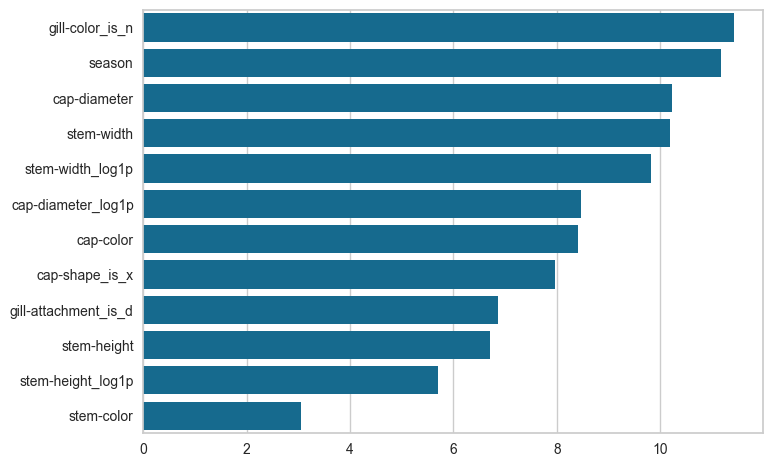

In [93]:
sns.barplot(x=feature_importance.values(), y=feature_importance.keys())

In [113]:
mcc_scoring = make_scorer(matthews_corrcoef)
pfi = permutation_importance(tuened_cb, valid_X, valid_y, n_repeats=1000,  scoring = mcc_scoring, random_state=42)

KeyboardInterrupt: 

In [112]:
perm = PermutationImportance(tuened_cb, random_state=42).fit(valid_X, valid_y)
eli5.show_weights(perm, feature_names = valid_X.columns.tolist())

NameError: name 'PermutationImportance' is not defined

In [19]:
val_pred = predict_model(tuened_cb, data=valid_X)

In [20]:
matthews_corrcoef(valid_y, val_pred["prediction_label"])

0.97658363153599

In [21]:
test_pred = predict_model(tuened_cb, data=test_data)

In [22]:
test_pred

,cap-diameter,cap-color,stem-height,stem-width,stem-color,season,cap-diameter_log1p,stem-width_log1p,stem-height_log1p,cap-shape_is_x,gill-attachment_is_d,gill-color_is_n,prediction_label,prediction_score
0,8.64,1,11.13,17.120001,0,1,2.265921,2.897016,2.495682,1,0,0,1,0.9407
1,6.90,-1,1.27,10.750000,1,1,2.066863,2.463853,0.819780,0,0,0,0,0.7923
2,2.00,1,6.18,3.140000,1,0,1.098612,1.420696,1.971299,0,0,1,0,0.9722
3,3.47,1,4.98,8.510000,0,1,1.497388,2.252344,1.788421,1,0,1,1,0.9940
4,6.17,2,6.73,13.700000,0,1,1.969906,2.687847,2.045109,1,0,0,1,0.5924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,0.88,-1,2.67,1.350000,0,1,0.631272,0.854415,1.300192,1,0,0,1,0.9982
2077960,3.12,-1,2.69,7.380000,0,1,1.415853,2.125848,1.305627,1,1,0,1,0.9313
2077961,5.73,-1,6.16,9.740000,0,1,1.906575,2.373975,1.968510,1,0,0,0,0.8020
2077962,5.03,1,6.00,3.460000,0,1,1.796747,1.495149,1.945910,0,0,0,0,0.9988


In [27]:
submission = pd.read_csv(DATA / "sample_submission.csv")

In [36]:
submission["class"] = np.where(test_pred["prediction_label"]==0, 'e', 'p')

In [37]:
submission

,id,class
0,3116945,p
1,3116946,e
2,3116947,e
3,3116948,p
4,3116949,p
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,e
2077962,5194907,e


In [31]:
submission.to_csv(DATA / "exp2.csv", index=False)